# Sums and Products of Quaternionic circulant matrices

In [1]:
import numpy as np 
from quaternion_circulant_matrix import quaternionic_circulant_filter
from quaternion_matrix import quatmatmul_matrix_by_vector, quatmatmul_matrix_by_matrix
from quaternion_circulant_matrix import create_qft_matrix
from quaternion_symplectic import vis
from quaternion_symplectic import qfft_right, qfft_eigenvalues
np.set_printoptions(precision=2, suppress=True)  # for compact output

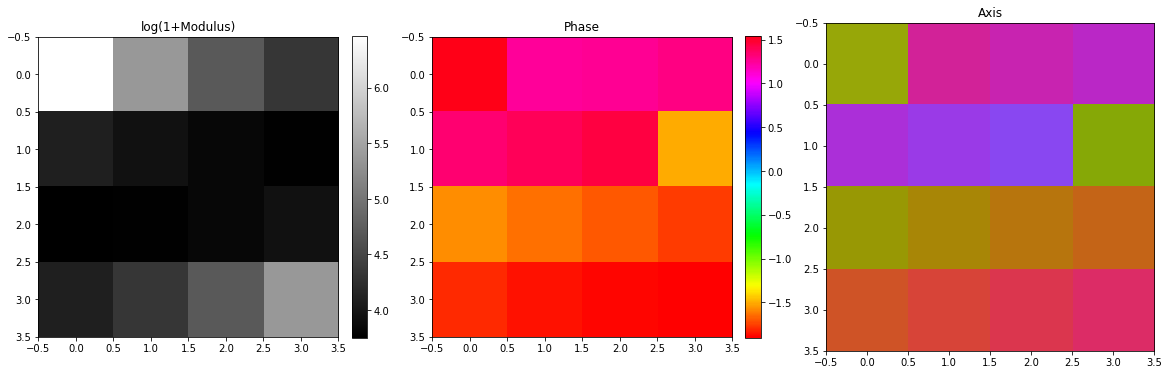

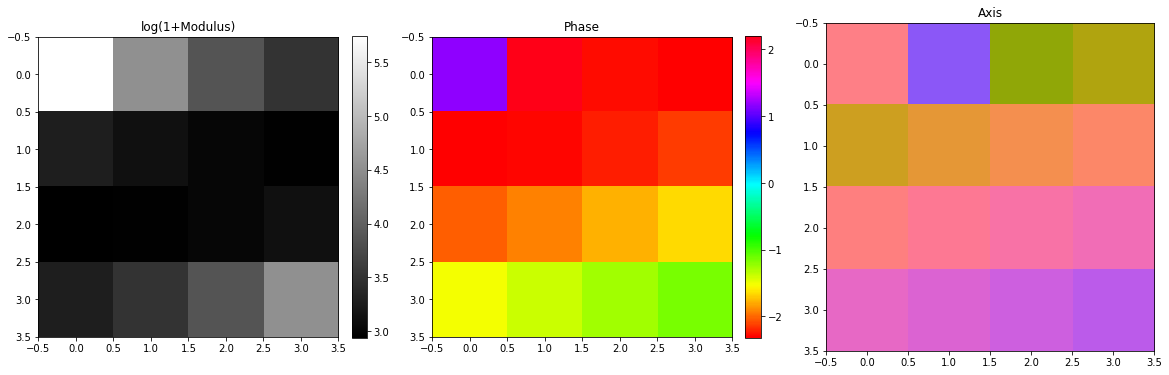

In [2]:
N = 16
mu = np.quaternion(0, 1, 1, 1).normalized()
p = np.quaternion(1, 2, 3, 4)
C_filter = np.zeros([N,], dtype=np.quaternion)
D_filter = np.zeros([N,], dtype=np.quaternion)
for i in range(N):
    C_filter[i] = np.quaternion(1, i, i+5, -5*i)
    D_filter[i] = np.quaternion(i, 3+2*i, 0, 1)
C = quaternionic_circulant_filter(C_filter)
D = quaternionic_circulant_filter(D_filter)
C_eigenvalues = np.sqrt(N) * qfft_right(C_filter, qft_axis=mu, apply_shift=False)
D_eigenvalues = np.sqrt(N) * qfft_right(D_filter, qft_axis=mu, apply_shift=False)
# Visualize eigenvalues
vis(np.reshape(C_eigenvalues, [N//4, 4]))
vis(np.reshape(D_eigenvalues, [N//4, 4]))
# Multiplication circulant x circulant

Difference should be (almost) zero: 5.572281391648652e-13


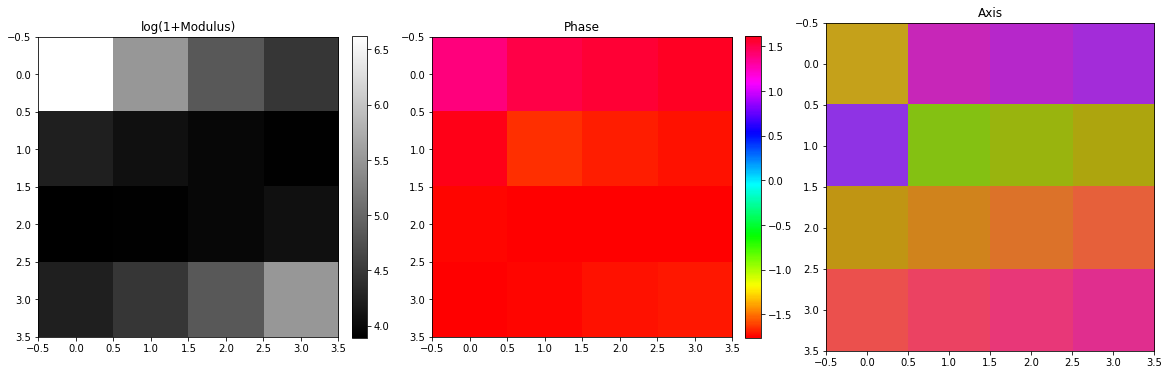

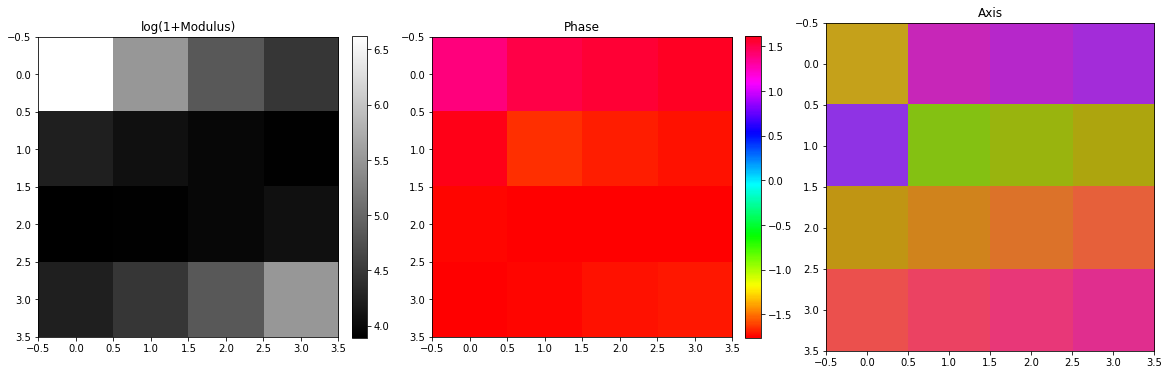

In [3]:
# Sum circulant + circulant
CplusD_eigenvalues = np.sqrt(N) * qfft_right(C_filter+D_filter, qft_axis=mu, apply_shift=False)
C_eigenvalues = np.sqrt(N) * qfft_right(C_filter, qft_axis=mu, apply_shift=False)
D_eigenvalues = np.sqrt(N) * qfft_right(D_filter, qft_axis=mu, apply_shift=False)
print('Difference should be (almost) zero: {}'.format(np.sum(np.abs(CplusD_eigenvalues - C_eigenvalues - D_eigenvalues))))
vis(np.reshape(CplusD_eigenvalues, [N//4, 4]))
vis(np.reshape(C_eigenvalues + D_eigenvalues, [N//4, 4]))

Difference should be (almost) zero: 2.5185358247207097e-12


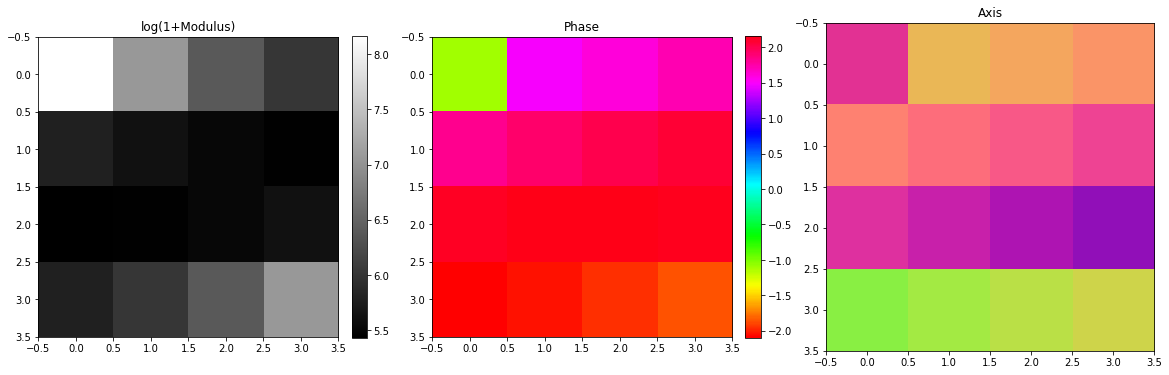

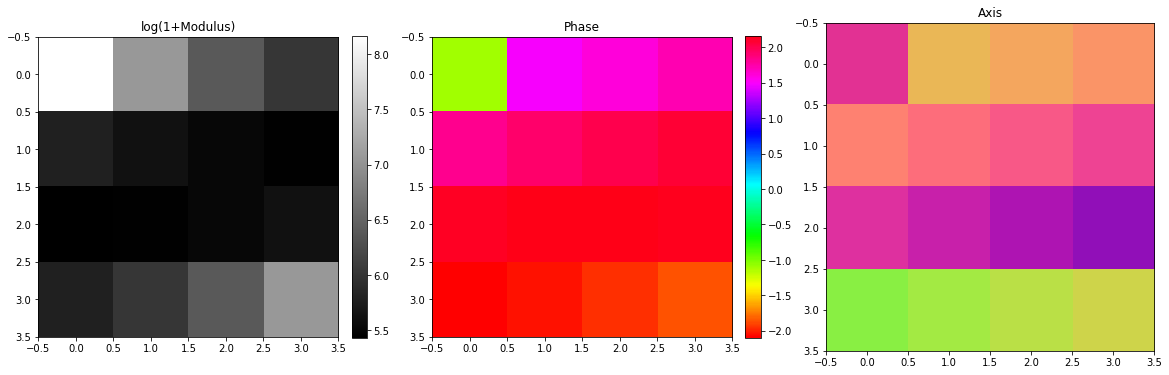

In [5]:
# Multiplication quaternion x circulant
pC = p*C
pC_eigenvalues = np.sqrt(N) * qfft_right(p*C_filter, qft_axis=mu, apply_shift=False)
print('Difference should be (almost) zero: {}'.format(np.sum(np.abs(pC_eigenvalues - p*C_eigenvalues))))
vis(np.reshape(pC_eigenvalues, [N//4, 4]))
vis(np.reshape(p*C_eigenvalues, [N//4, 4]))

Difference should be (almost) zero: 2.9413451409256714e-12


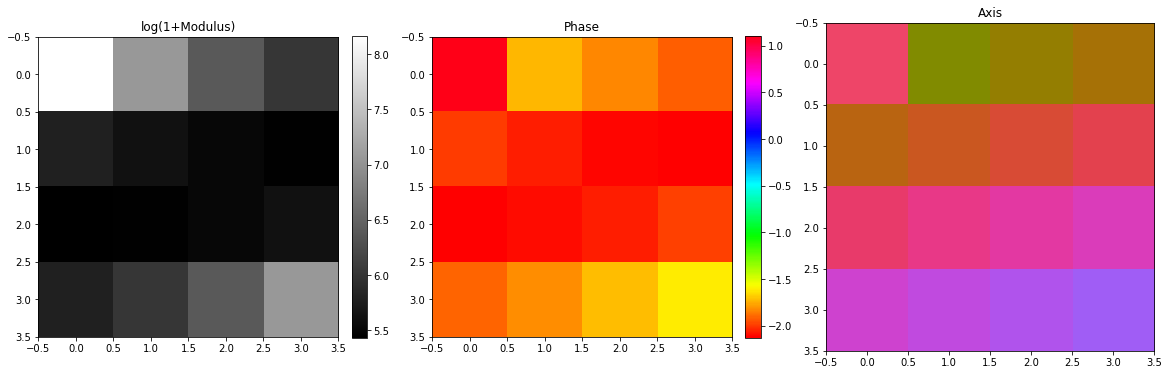

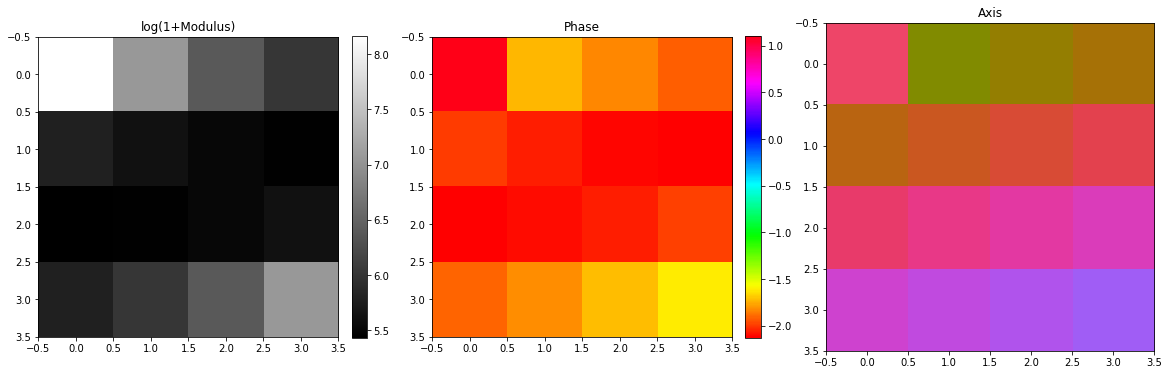

In [6]:
# Multiplication circulant x quaternion
newaxis = p*mu*p.inverse()
# Account for numerical errors
newaxis.real = 0
newxis = newaxis.normalized()
#
Cp_eigenvalues = np.sqrt(N) * qfft_right(C_filter*p, qft_axis=mu, apply_shift=False)
proposition_eigenvalues = np.sqrt(N) * qfft_right(C_filter, qft_axis=newaxis, apply_shift=False) * p
print('Difference should be (almost) zero: {}'.format(np.sum(np.abs(Cp_eigenvalues - proposition_eigenvalues))))
vis(np.reshape(Cp_eigenvalues, [N//4, 4]))
vis(np.reshape(proposition_eigenvalues, [N//4, 4]))

Difference should be (almost) zero: 1.3775600913848993e-10


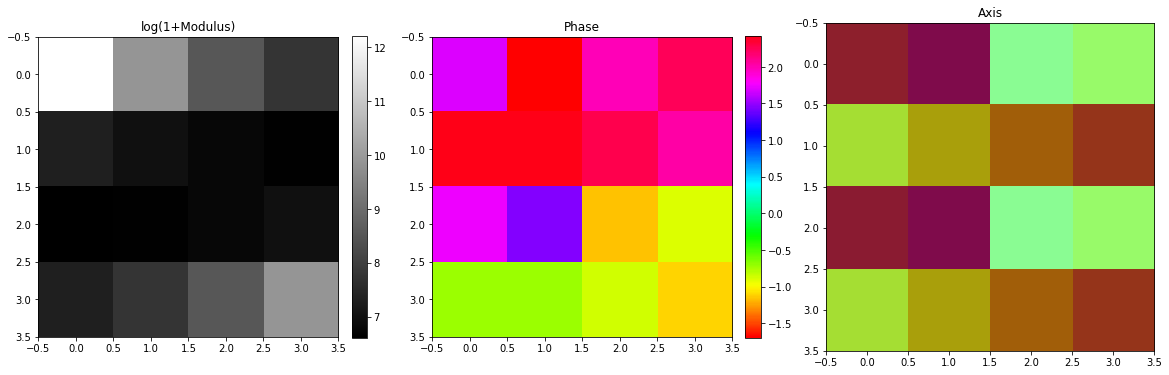

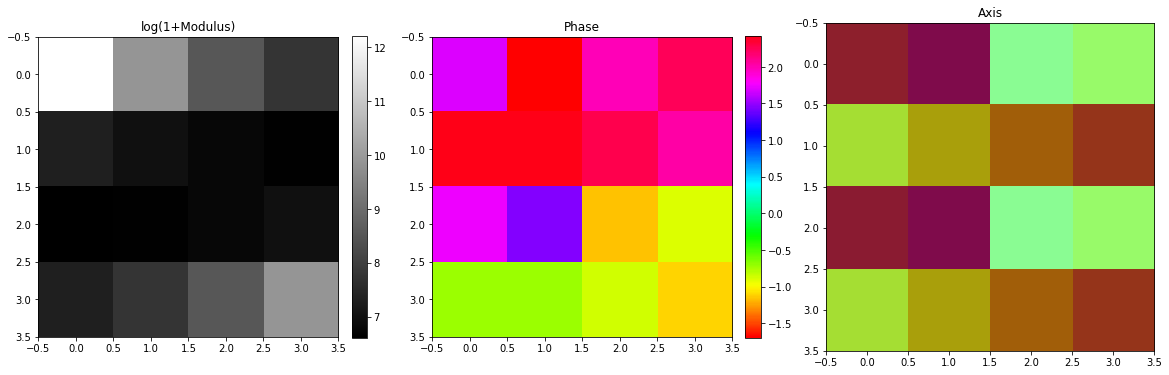

In [7]:
# Multiplication circulant by circulant
CD = quatmatmul_matrix_by_matrix(C, D)
CD_filter = CD[:, 0] #The first column is the kernel, by convention
D_eigenvalues = np.sqrt(N) * qfft_right(D_filter, qft_axis=mu, apply_shift=False)
CD_eigenvalues = np.sqrt(N) * qfft_right(CD_filter, qft_axis=mu, apply_shift=False)
proposition_eigenvalues = np.zeros([N,], dtype=np.quaternion)
for i in range(N):
    d = D_eigenvalues[i]
    newaxis = d*mu*d.inverse()
    newaxis.real = 0
    newxis = newaxis.normalized()
    tt = np.sqrt(N) * qfft_right(C_filter, qft_axis=newaxis, apply_shift=False)
    proposition_eigenvalues[i] = tt[i] * d

print('Difference should be (almost) zero: {}'.format(np.sum(np.abs(CD_eigenvalues - proposition_eigenvalues))))
vis(np.reshape(CD_eigenvalues, [N//4, 4]))
vis(np.reshape(proposition_eigenvalues, [N//4, 4]))

In [8]:
# Inverse of circulant
import quaternion
C_filter = quaternion.as_quat_array(np.random.randn(N, 4))
C = quaternionic_circulant_filter(C_filter)

from quaternion_matrix import quaternion_matrix_inverse, quatmatmul_matrix_by_matrix
Cinv = quaternion_matrix_inverse(C)
#tt2 = quatmatmul_matrix_by_matrix(C, Cinv)
Cinv_filter = Cinv[:, 0]
C_eigenvalues = qfft_eigenvalues(C_filter, qft_axis=mu)
Cinv_eigenvalues = qfft_eigenvalues(Cinv_filter, qft_axis=mu)

Q = create_qft_matrix(N=N, axis=-mu)
shouldbe_zerosum = 0
for i in range(N):
    column_i = Q[:, i]
    proposition_eigenvector = C_eigenvalues[i] * column_i * C_eigenvalues[i].inverse()
    result_of_Cinv_x = quatmatmul_matrix_by_vector(Cinv, proposition_eigenvector)
    result_of_linvx = C_eigenvalues[i].inverse() * proposition_eigenvector
    #
    #result_of_Cx = quatmatmul_matrix_by_vector(C, column_i)
    #result_of_lx = C_eigenvalues[i] * column_i
    #tt1 = np.sum(np.abs(result_of_Cx-result_of_lx))
    tt2 = np.sum(np.abs(result_of_Cinv_x-result_of_linvx))
    print(tt2)
    shouldbe_zerosum += tt2
print(f'Difference between C^{-1}z and λ^{-1}z is in total {shouldbe_zerosum} (in theory it must be zero).')



7.809481949595313e-16
5.842872784524833e-16
8.565462943284555e-16
1.298114354141721e-15
1.564524760310728e-15
1.1404973007565843e-15
1.8027481554610276e-15
2.2291935697315538e-15
2.962064140746133e-15
2.7317744394819454e-15
2.7560533471204195e-15
1.7417275245481255e-15
3.773826464706066e-15
3.700072723404311e-15
4.586586040680595e-15
4.757598547992625e-15
Difference between C^-1z and λ^-1z is in total 3.7266563136822316e-14 (in theory it must be zero).


In [9]:
# Inverse of circulant
import quaternion
C_filter = quaternion.as_quat_array(np.random.randn(N, 4))
C = quaternionic_circulant_filter(C_filter)

from quaternion_matrix import quaternion_matrix_inverse, quatmatmul_matrix_by_matrix
Cinv = quaternion_matrix_inverse(C)
#tt2 = quatmatmul_matrix_by_matrix(C, Cinv)
Cinv_filter = Cinv[:, 0]
C_eigenvalues = qfft_eigenvalues(C_filter, qft_axis=mu)
Cinv_eigenvalues = qfft_eigenvalues(Cinv_filter, qft_axis=mu)

Q = create_qft_matrix(N=N, axis=-mu)
shouldbe_zerosum = 0
for i in range(N):
    column_i = Q[:, i]
    proposition_eigenvector = C_eigenvalues[i] * column_i * C_eigenvalues[i].inverse()
    result_of_Cinv_x = quatmatmul_matrix_by_vector(Cinv, proposition_eigenvector)
    result_of_linvx = C_eigenvalues[i].inverse() * proposition_eigenvector
    #
    #result_of_Cx = quatmatmul_matrix_by_vector(C, column_i)
    #result_of_lx = C_eigenvalues[i] * column_i
    #tt1 = np.sum(np.abs(result_of_Cx-result_of_lx))
    tt2 = np.sum(np.abs(result_of_Cinv_x-result_of_linvx))
    print(tt2)
    shouldbe_zerosum += tt2
print(f'Difference between C^{-1}z and λ^{-1}z is in total {shouldbe_zerosum} (in theory it must be zero).')



1.0343590765019058e-15
1.3503086787636255e-15
1.7591998795902764e-15
1.9984266150385696e-15
3.0300152454136447e-15
2.453427993740007e-15
2.206934849503256e-15
3.59799007874872e-15
5.553938068752517e-15
3.81804313162583e-15
6.288080836234633e-15
3.1393086809999644e-15
6.713597709089694e-15
5.701164036567334e-15
9.331860933209104e-15
8.250626279621495e-15
Difference between C^-1z and λ^-1z is in total 6.622728209340057e-14 (in theory it must be zero).
